# **I. Data Cleaning**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# import data
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))



Saving Cleaned_final.csv to Cleaned_final.csv
User uploaded file "Cleaned_final.csv" with length 142002 bytes


In [ ]:
import pandas as pd
df = pd.read_csv(fn)
df.head()

,age,household_size,PHQ4_2,WCRex1,i12_health_22,i12_health_26,i12_health_27,vac2_3,vac2_7,gender_Male,vac_man_6_Yes
0,52,4,4,4,5,5,5,5,1,0,1
1,51,2,2,5,5,5,5,5,5,0,1
2,57,1,0,5,5,4,5,5,1,0,1
3,64,1,2,2,5,5,5,3,3,0,1
4,45,5,4,4,5,5,5,5,5,1,0


In [ ]:
selected_columns = ['vac_man_6','gender', 'age', 'household_size', 'PHQ4_2','WCRex1',
                   'i12_health_22', 'i12_health_26', 'i12_health_27', 'vac2_3', 'vac2_7']
df = df[selected_columns]
df.reset_index(inplace = True,drop = True)

In [ ]:
#df.isna().sum()

In [ ]:
# For gender and vac_man_6
df = pd.get_dummies(df, columns=['gender','vac_man_6'], drop_first=True)
df*1
df['gender_Male'] = df['gender_Male'].astype(int)
# Assuming 'SomeCategory' is the second category of 'vac_man_6' after one was dropped
df['vac_man_6_Yes'] = df['vac_man_6_Yes'].astype(int)

In [ ]:
# For i12_health_22, i12_health_26, w3, i12_health_27
scale_mapping1 = {
    'Always': 5,
    'Frequently': 4,
    'Sometimes': 3,
    'Rarely': 2,
    'Not at all': 1
}

for col in df.iloc[:, [4, 5, 6]]:
    df[col] = df[col].map(scale_mapping1).astype(int)

In [ ]:
# For PHQ4_2, there are 229 choose 'prefer not to say', we consider as 0.
scale_mapping2 = {
    'Not at all': 4,
    'Several days': 3,
    'More than half the days': 2,
    'Nearly every day': 1,
    'Prefer not to say': 0
}

df['PHQ4_2'] = df['PHQ4_2'].map(scale_mapping2).astype(int)

In [ ]:
#For WCRex1 :
scale_mapping3 = {
    'Very well': 5,
    'Somewhat well': 4,
    'Somewhat badly': 3,
    'Very badly': 2,
    "Don't know": 1
}

df['WCRex1'] = df['WCRex1'].map(scale_mapping3).astype(int)

In [ ]:
scale_mapping4 = {
    '1 - Strongly agree': 5,
    '2':4,
    '3':3,
    '4':2,
    '5 – Strongly disagree':1
}

for column in ['vac2_3', 'vac2_7']:
    df[column] = df[column].map(scale_mapping4).astype(int)

In [ ]:
# For household_size, there are total 4% people answered 'not to say' or 'I do not know', so I consider to drop these answers or convert it to 0.
df = df[df['household_size'].isin(['Prefer not to say', "Don't know"]) == False]
df.iloc[:,1] = df.iloc[:,1].replace(r'[^0-9]', '', regex=True)
df['household_size'] = df['household_size'].astype(int)

<ipython-input-31-5a9ac23b17cf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[:,1] = df.iloc[:,1].replace(r'[^0-9]', '', regex=True)
<ipython-input-31-5a9ac23b17cf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['household_size'] = df['household_size'].astype(int)


In [ ]:
df.dtypes

age               int64
household_size    int64
PHQ4_2            int64
WCRex1            int64
i12_health_22     int64
i12_health_26     int64
i12_health_27     int64
vac2_3            int64
vac2_7            int64
gender_Male       int64
vac_man_6_Yes     int64
dtype: object

In [ ]:
#df.to_csv('Cleaned.csv',index = False)

# **II. EDA**

In [ ]:
df.info() #check the data types and null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6169 entries, 0 to 6429
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             6169 non-null   int64
 1   household_size  6169 non-null   int64
 2   PHQ4_2          6169 non-null   int64
 3   WCRex1          6169 non-null   int64
 4   i12_health_22   6169 non-null   int64
 5   i12_health_26   6169 non-null   int64
 6   i12_health_27   6169 non-null   int64
 7   vac2_3          6169 non-null   int64
 8   vac2_7          6169 non-null   int64
 9   gender_Male     6169 non-null   int64
 10  vac_man_6_Yes   6169 non-null   int64
dtypes: int64(11)
memory usage: 578.3 KB


In [ ]:
# Get Basic Statistical Summary
df.describe()

,age,household_size,PHQ4_2,WCRex1,i12_health_22,i12_health_26,i12_health_27,vac2_3,vac2_7,gender_Male,vac_man_6_Yes
count,6169.000000,6169.000000,6169.000000,6169.000000,6169.000000,6169.000000,6169.000000,6169.000000,6169.000000,6169.000000,6169.000000
mean,50.438969,2.615659,3.012482,3.422759,4.750851,4.094018,3.773545,3.514346,3.061112,0.458583,0.443670
std,17.952295,1.472276,1.111784,1.051175,0.811723,1.378891,1.367745,1.320851,1.315992,0.498322,0.496857
min,18.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,35.000000,2.000000,2.000000,3.000000,5.000000,4.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51.000000,2.000000,3.000000,4.000000,5.000000,5.000000,4.000000,4.000000,3.000000,0.000000,0.000000
75%,66.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1.000000
max,90.000000,8.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000


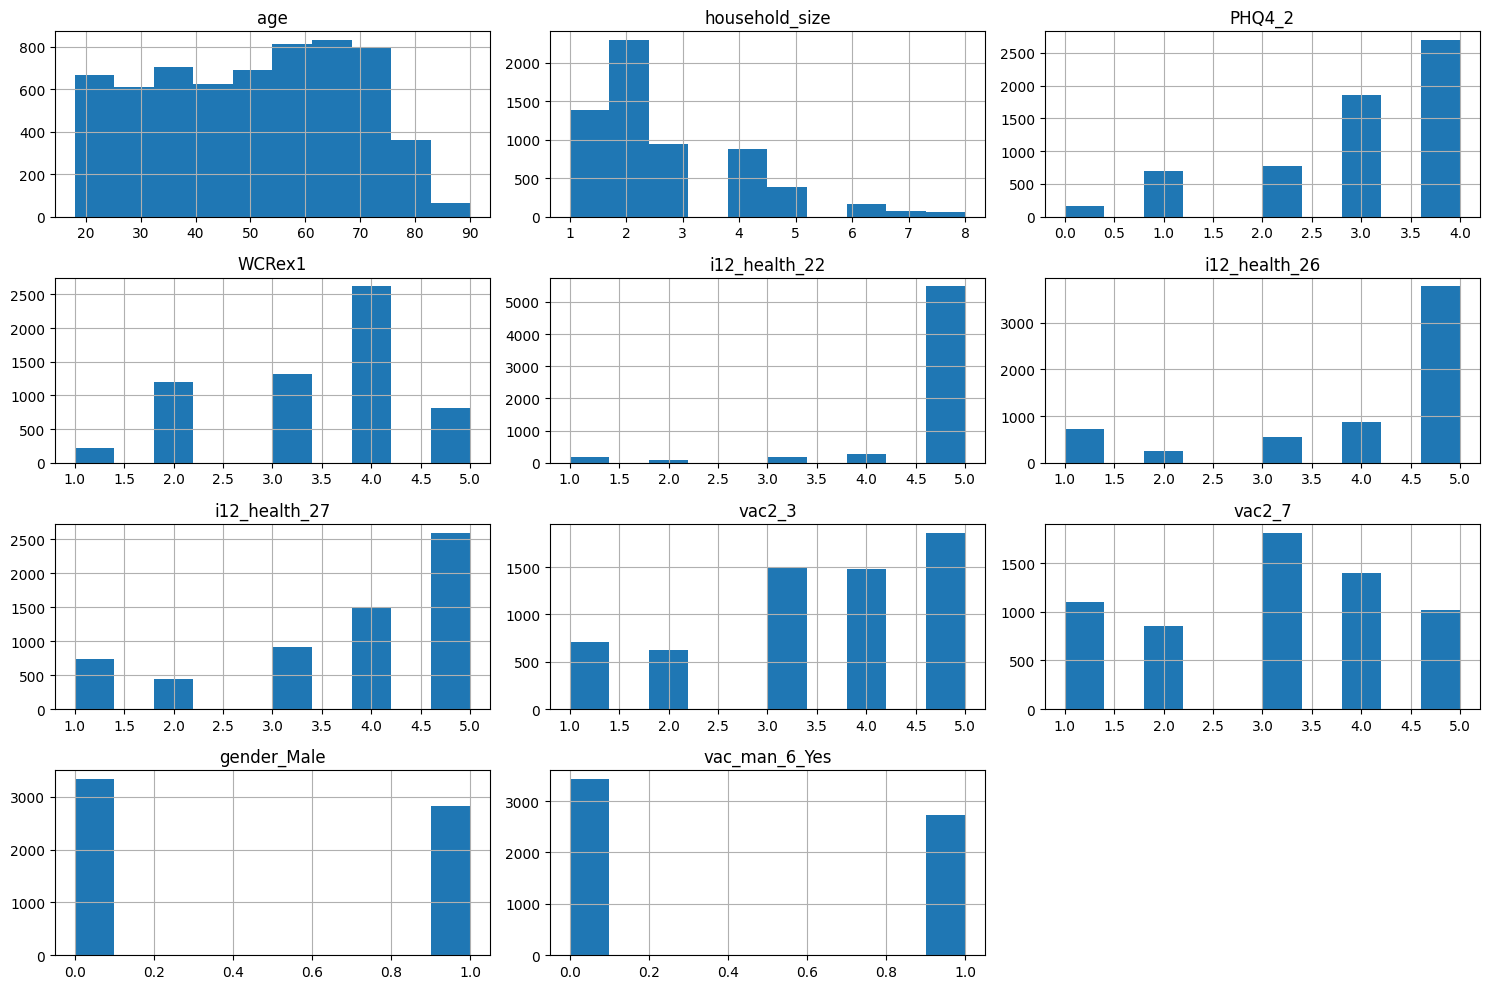

In [ ]:
#Perform Histograms for each variables
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

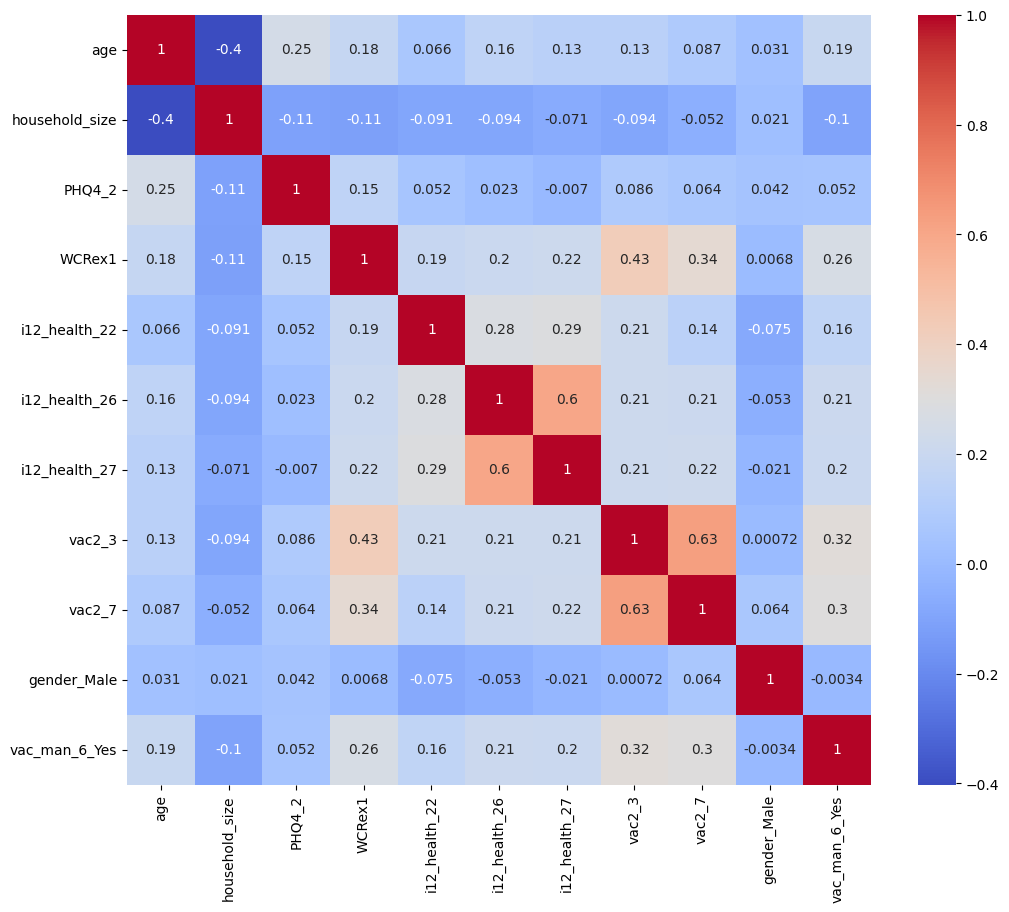

In [ ]:
# Correlation heatmap
correlation = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
#categorical variables
#Both female and male people have close number on five levels, there is no clear difference.
#0 is female, 1 is male
#Based on the crosstable, female are more likely to worry about covid-19
crosstab = pd.crosstab(df["vac_man_6_Yes"], df["gender_Male"],
margins=False)
pd.crosstab(df["vac_man_6_Yes"], df["gender_Male"], margins=True)

gender_Male,0,1,All
vac_man_6_Yes,,,
0,1853,1579,3432
1,1487,1250,2737
All,3340,2829,6169


In [ ]:
# Take a look of level 5, there are 403 people who strongly disagree the government will provide support on covid also dsiagree
# that they worry about covid 19. However, there are 543 people who strongly agree the government
# will provide support also worry about covid19. Does not make sense
crosstab = pd.crosstab(df["vac_man_6_Yes"], df["vac2_3"],
margins=False)
pd.crosstab(df["vac_man_6_Yes"], df["vac2_3"], margins=True)

vac2_3,1,2,3,4,5,All
vac_man_6_Yes,,,,,,
0,597,420,994,741,680,3432
1,109,207,495,741,1185,2737
All,706,627,1489,1482,1865,6169


<Axes: xlabel='vac_man_6_Yes', ylabel='Density'>

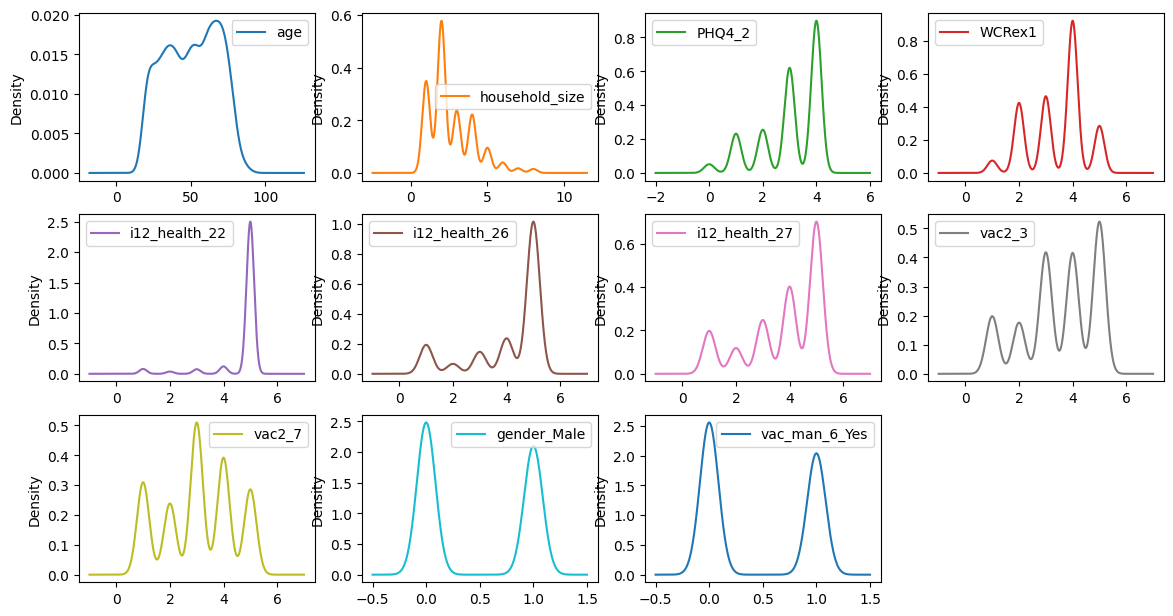

In [ ]:
#Explore numerica variables
#Density plot
df.plot(figsize=(14,10), kind='density', subplots=True, layout=(4,4),
sharex=False)
sns.kdeplot(df["vac_man_6_Yes"])
#Several variables (vac2_1, WCRex1, vac2_3, and vac2_7) show a cyclical or periodic distribution, suggesting they might be ordinal or categorical in nature.
#Variables like age and household_size provide insights into their real-world meanings; for instance, fewer large households and older individuals.
#Some variables, such as PHQ4_2 and i12_health_27, show multimodal distributions, indicating multiple groupings or categories within them.

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(1, 0, 'age'),
  Text(2, 0, 'household_size'),
  Text(3, 0, 'PHQ4_2'),
  Text(4, 0, 'WCRex1'),
  Text(5, 0, 'i12_health_22'),
  Text(6, 0, 'i12_health_26'),
  Text(7, 0, 'i12_health_27'),
  Text(8, 0, 'vac2_3'),
  Text(9, 0, 'vac2_7'),
  Text(10, 0, 'gender_Male'),
  Text(11, 0, 'vac_man_6_Yes')])

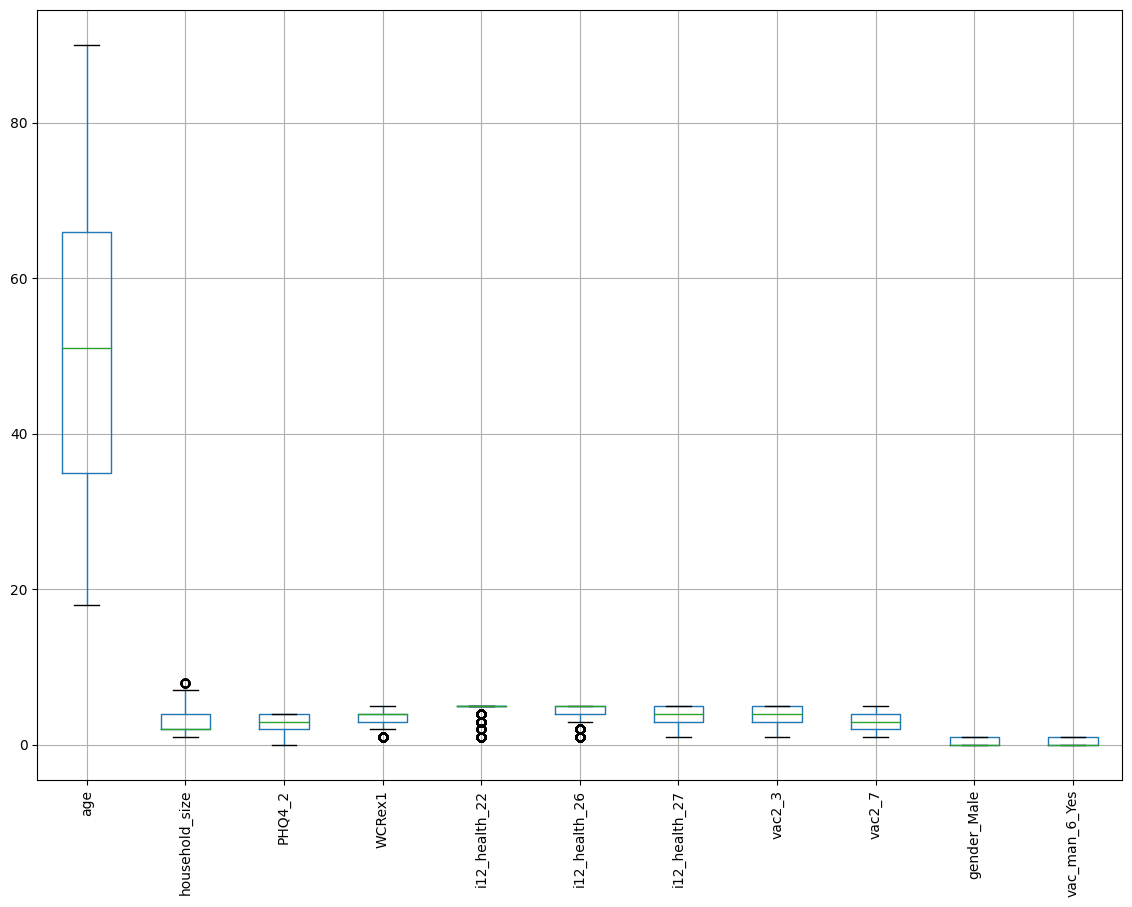

In [ ]:
# Box and Whisker Plots
df.boxplot(figsize=(14,10))
plt.xticks(rotation=90)

#The boxplot of age variable sigificantly differ from other variables
#The remaining boxplots to the right have a similar distribution pattern, with values mostly close to zero. They might represent categories or variables that have a smaller impact or lower values compared to the first.
#he outlier observed in the last boxplot might indicate a unique event or anomaly for that category.

age                  Axes(0.125,0.712609;0.168478x0.167391)
household_size    Axes(0.327174,0.712609;0.168478x0.167391)
PHQ4_2            Axes(0.529348,0.712609;0.168478x0.167391)
WCRex1            Axes(0.731522,0.712609;0.168478x0.167391)
i12_health_22        Axes(0.125,0.511739;0.168478x0.167391)
i12_health_26     Axes(0.327174,0.511739;0.168478x0.167391)
i12_health_27     Axes(0.529348,0.511739;0.168478x0.167391)
vac2_3            Axes(0.731522,0.511739;0.168478x0.167391)
vac2_7                Axes(0.125,0.31087;0.168478x0.167391)
gender_Male        Axes(0.327174,0.31087;0.168478x0.167391)
vac_man_6_Yes      Axes(0.529348,0.31087;0.168478x0.167391)
dtype: object

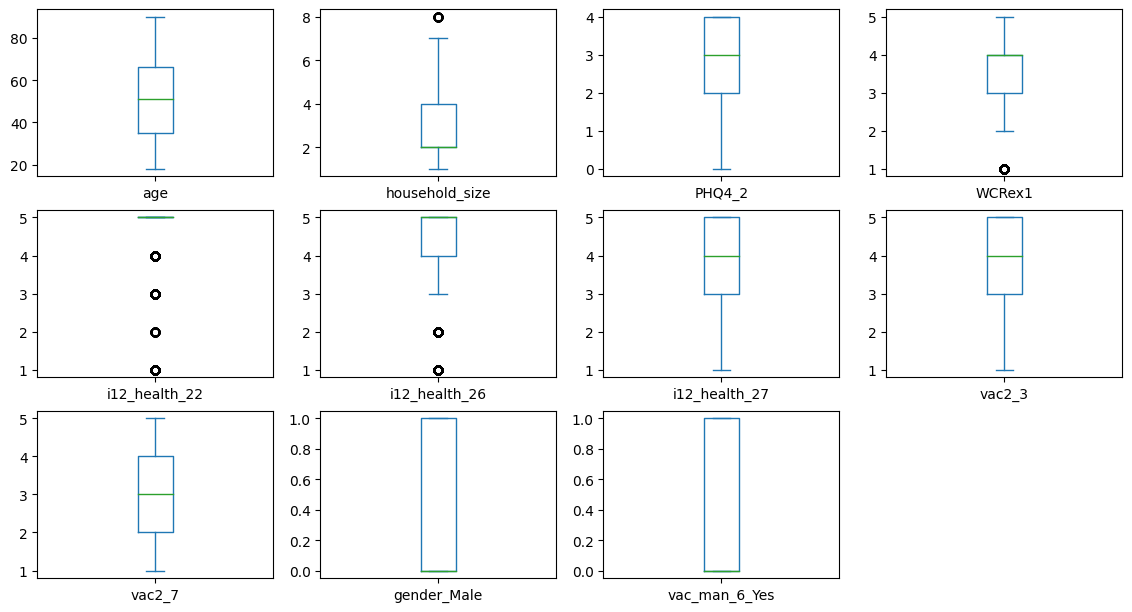

In [ ]:
df.plot(figsize=(14,10), kind = 'box', subplots = True, layout = (4,4), sharex = False, sharey = False)

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='household_size', ylabel='age'>,
        <Axes: xlabel='PHQ4_2', ylabel='age'>,
        <Axes: xlabel='WCRex1', ylabel='age'>,
        <Axes: xlabel='i12_health_22', ylabel='age'>,
        <Axes: xlabel='i12_health_26', ylabel='age'>,
        <Axes: xlabel='i12_health_27', ylabel='age'>,
        <Axes: xlabel='vac2_3', ylabel='age'>,
        <Axes: xlabel='vac2_7', ylabel='age'>,
        <Axes: xlabel='gender_Male', ylabel='age'>,
        <Axes: xlabel='vac_man_6_Yes', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='household_size'>,
        <Axes: xlabel='household_size', ylabel='household_size'>,
        <Axes: xlabel='PHQ4_2', ylabel='household_size'>,
        <Axes: xlabel='WCRex1', ylabel='household_size'>,
        <Axes: xlabel='i12_health_22', ylabel='household_size'>,
        <Axes: xlabel='i12_health_26', ylabel='household_size'>,
        <Axes: xlabel='i12_health_27', ylabel='household_size'>,
        <Axe

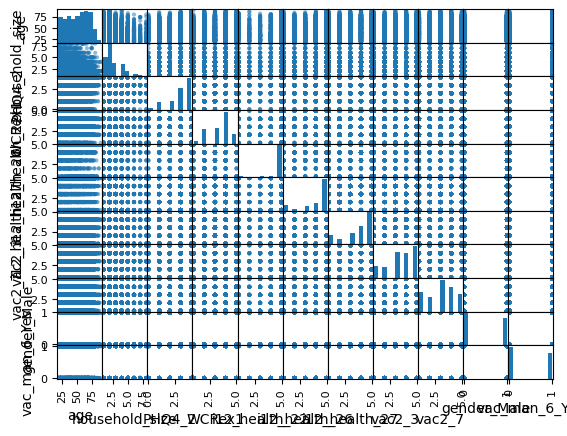

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df)

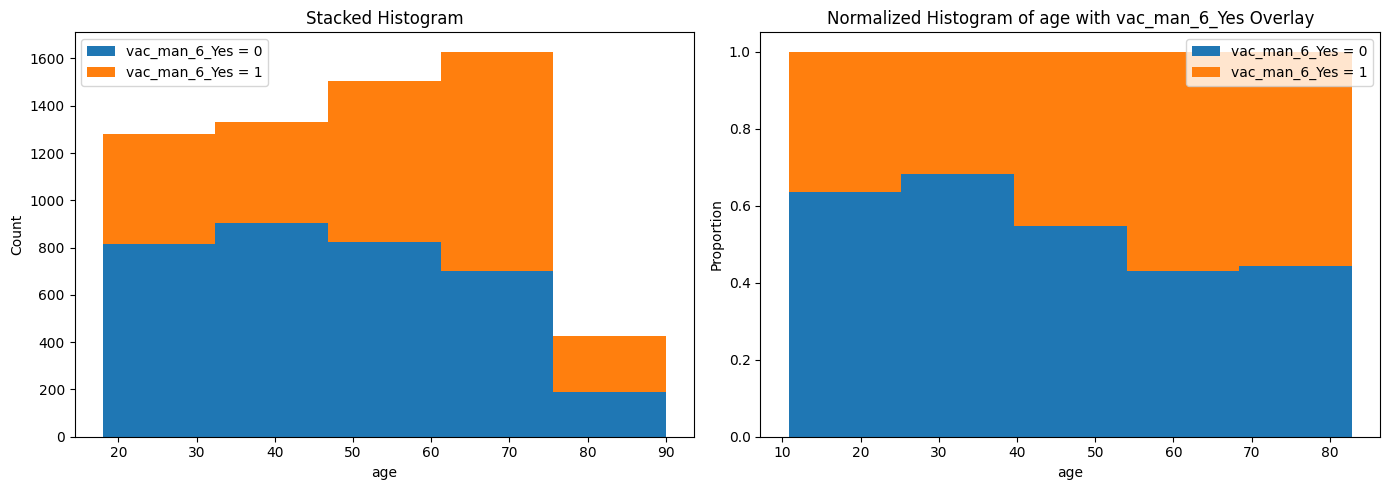

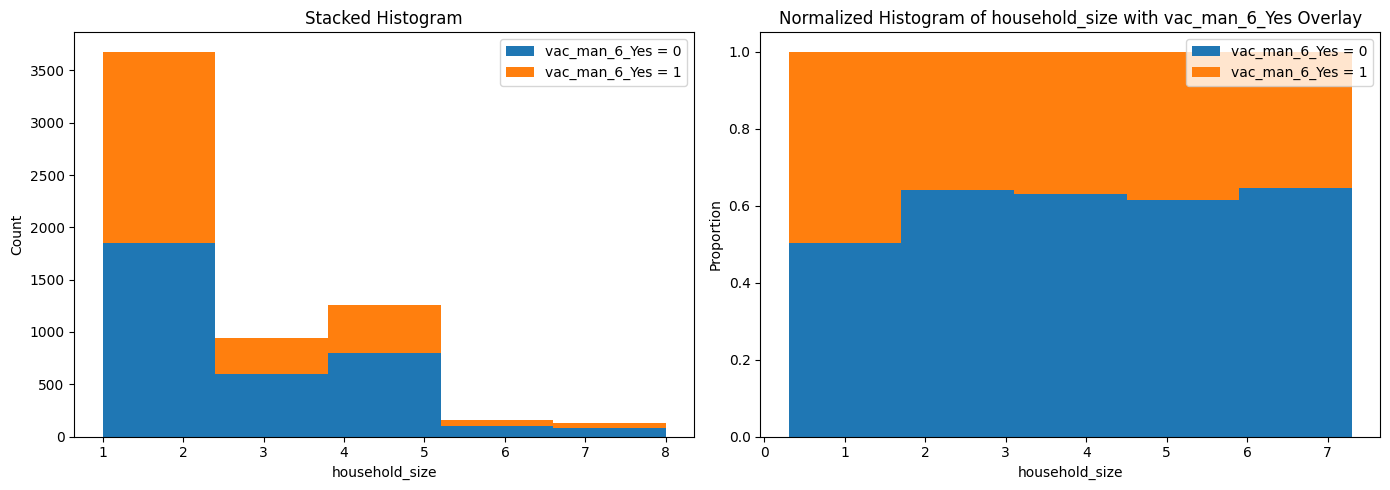

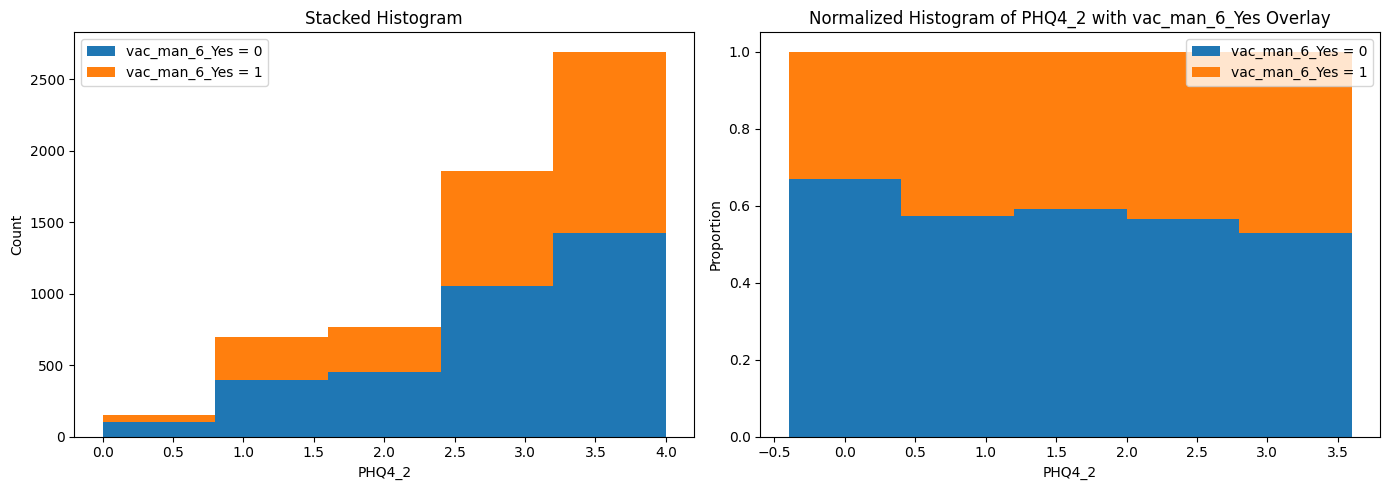

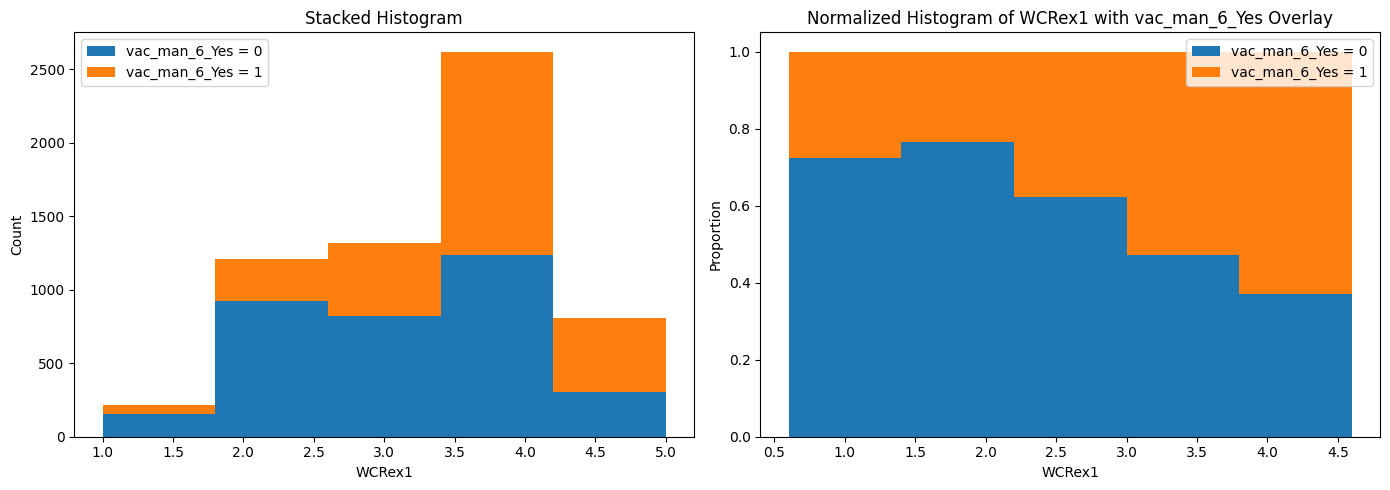

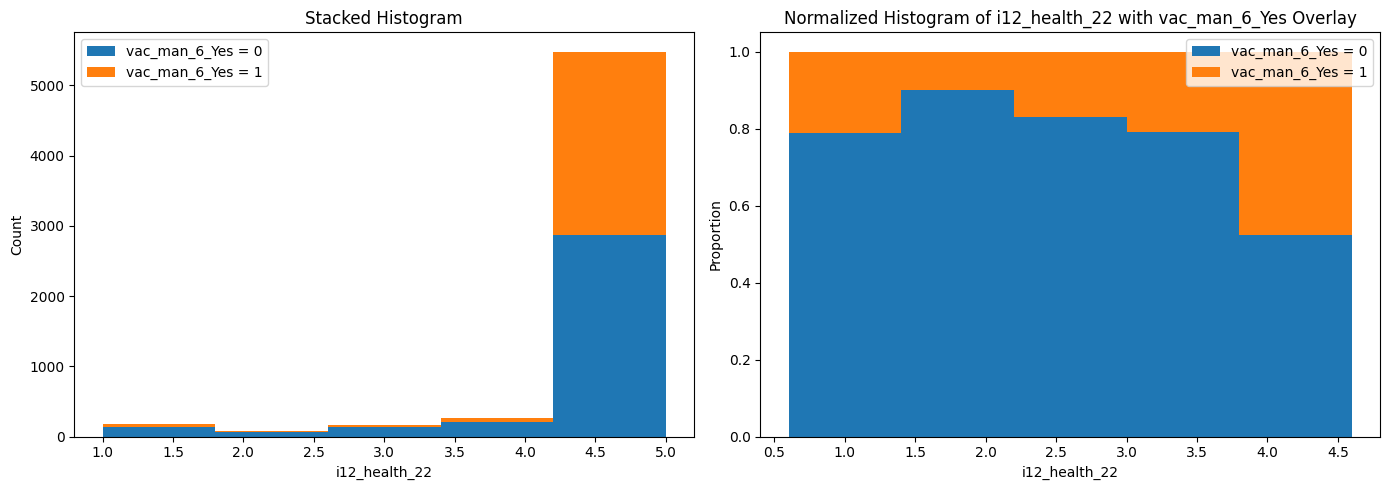

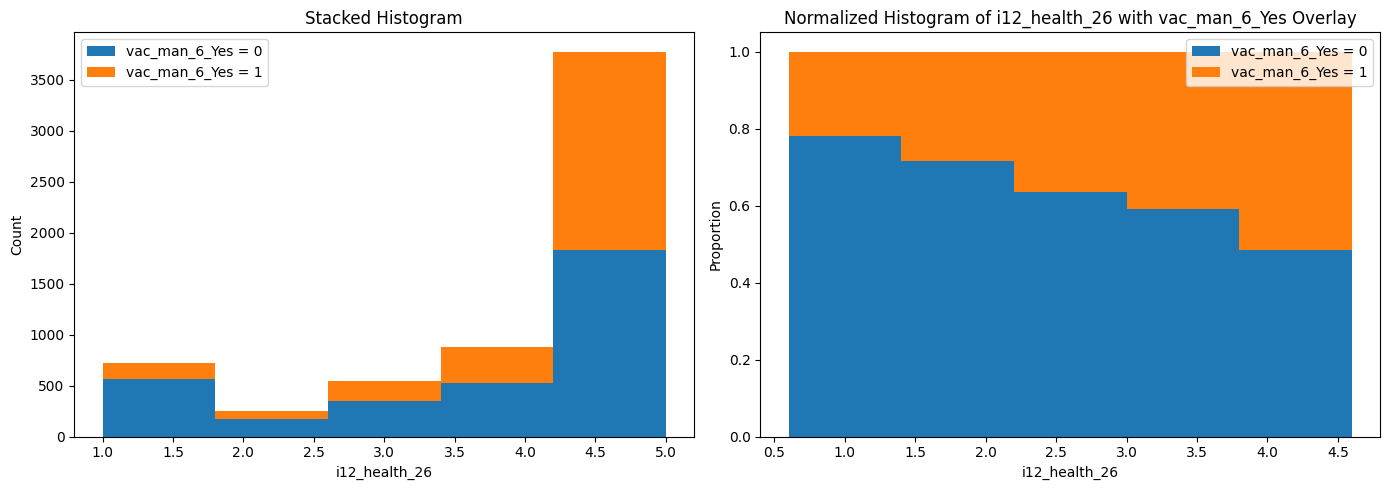

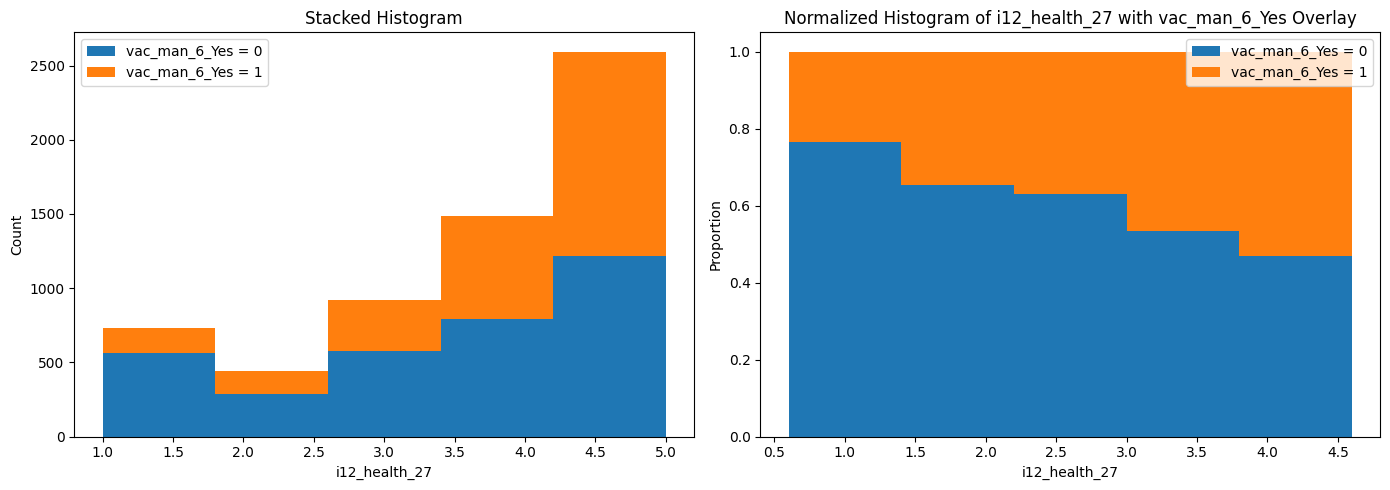

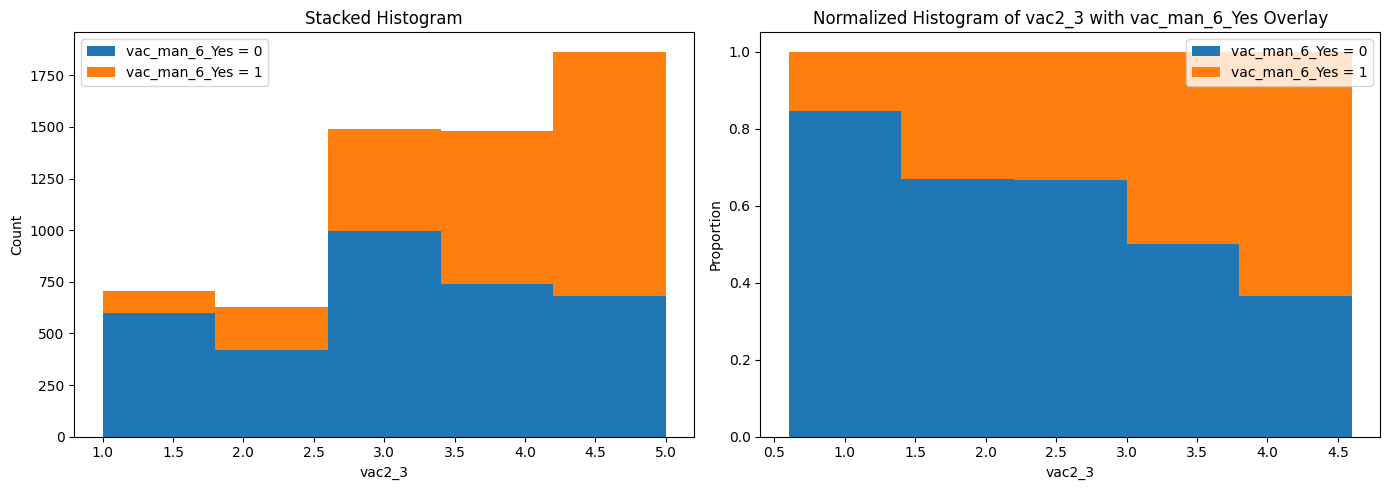

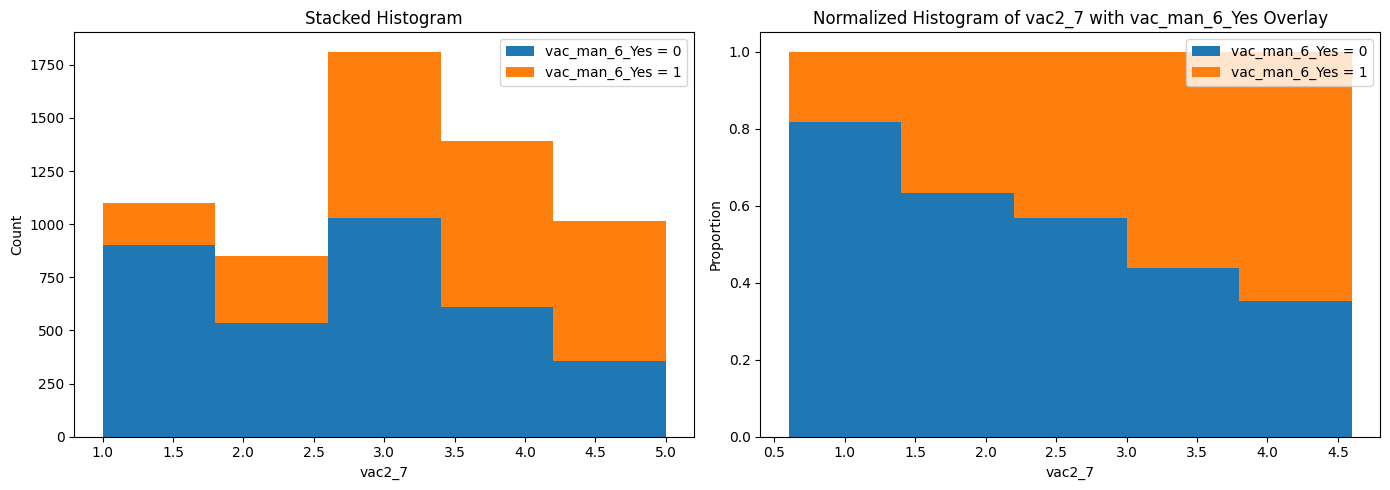

<ipython-input-44-4b747cc1e564>:20: RuntimeWarning: invalid value encountered in divide
  n_norm = n_table / n_table.sum(axis=1)[:, None]


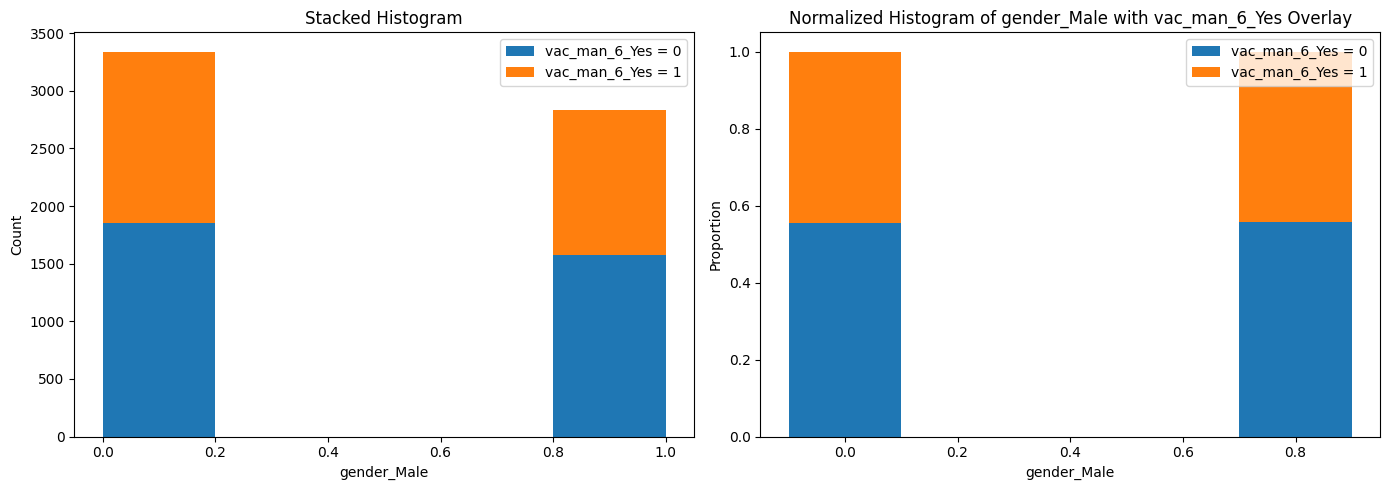

In [ ]:
# Plot all stacked histogram of all predictor variables on the target
cols = df.columns[:-1]
for i in range(len(cols)):
  vac_col_0 = df[df["vac_man_6_Yes"] == 0][cols[i]]
  vac_col_1 = df[df["vac_man_6_Yes"] == 1][cols[i]]

  fig, axs = plt.subplots(1, 2, figsize=(14, 5))

  # Plot 1
  axs[0].hist([vac_col_0, vac_col_1], bins = 5, stacked = True, )
  axs[0].legend(['vac_man_6_Yes = 0', 'vac_man_6_Yes = 1'])
  axs[0].set_title('Stacked Histogram')
  axs[0].set_xlabel(cols[i])
  axs[0].set_ylabel('Count')

  # Plot 2
  (n, bins, patches) = axs[1].hist([vac_col_0, vac_col_1], bins=5, stacked=True)
  n[1] = n[1] - n[0]
  n_table = np.column_stack((n[0], n[1]))
  n_norm = n_table / n_table.sum(axis=1)[:, None]
  ourbins = np.column_stack((bins[:-1], bins[1:]))
  axs[1].clear()  # Clear the stacked histogram we just plotted, as we only needed it for the binning
  axs[1].bar(x=ourbins[:, 0], height=n_norm[:, 0], width=ourbins[:, 1] - ourbins[:, 0])
  axs[1].bar(x=ourbins[:, 0], height=n_norm[:, 1], width=ourbins[:, 1] - ourbins[:, 0], bottom=n_norm[:, 0])
  axs[1].legend(['vac_man_6_Yes = 0', 'vac_man_6_Yes = 1'])
  axs[1].set_title('Normalized Histogram of %s with vac_man_6_Yes Overlay' % (cols[i]))
  axs[1].set_xlabel(cols[i])
  axs[1].set_ylabel('Proportion')

  plt.tight_layout()
  plt.show()
  #plt.savefig('vac_man vs %s.png' % cols[i])

# **III. KNN Model**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from matplotlib.colors import ListedColormap

In [ ]:
# split train and test set
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

test_size = 0.3
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)

In [ ]:
power_transformer = PowerTransformer(method='box-cox')

features_to_box = ['WCRex1', 'i12_health_22','i12_health_26', 'i12_health_27']

for feature in features_to_box:
    X_train[feature] = power_transformer.fit_transform(X_train[[feature]])
    X_test[feature] = power_transformer.fit_transform(X_test[[feature]])


In [ ]:
power_transformer = PowerTransformer(method='box-cox')

X_train['household_size'] = power_transformer.fit_transform(X_train[['household_size']])
X_test['household_size'] = power_transformer.transform(X_test[['household_size']])

In [ ]:
zscore_scaler = StandardScaler()
features_to_normalize = ['age', 'vac2_3', 'vac2_7']

for feature in features_to_normalize:
    X_train[feature] = zscore_scaler.fit_transform(X_train[[feature]])
    X_test[feature] = zscore_scaler.transform(X_test[[feature]])

In [ ]:
k_values = list(range(1,21))
kfold = StratifiedKFold(n_splits = 10, random_state = 1, shuffle = True)

In [ ]:
evaluation = {
    'k_value': [],
    'accuracy': []
}

X_train_np = np.array(X_train)
y_train_np = np.array(y_train)

for k in k_values:
    model = KNeighborsClassifier(n_neighbors = k)
    accuracy_scores = []

    for train_index, test_index in kfold.split(X_train_np, y_train_np):
        X_train_fold, X_test_fold = X_train_np[train_index], X_train_np[test_index]
        y_train_fold, y_test_fold = y_train_np[train_index], y_train_np[test_index]

        model.fit(X_train_fold, y_train_fold)
        y_pred = model.predict(X_test_fold)

        acc = accuracy_score(y_test_fold, y_pred)

        accuracy_scores.append(acc)

    evaluation['k_value'].append(k)
    evaluation['accuracy'].append(np.mean(accuracy_scores))

score = pd.DataFrame(evaluation)
print(score)

    k_value  accuracy
0         1  0.622278
1         2  0.623668
2         3  0.643131
3         4  0.635482
4         5  0.647989
5         6  0.635713
6         7  0.639887
7         8  0.640804
8         9  0.653545
9        10  0.651227
10       11  0.650066
11       12  0.655165
12       13  0.651459
13       14  0.651919
14       15  0.653079
15       16  0.654702
16       17  0.663038
17       18  0.661881
18       19  0.667212
19       20  0.664199


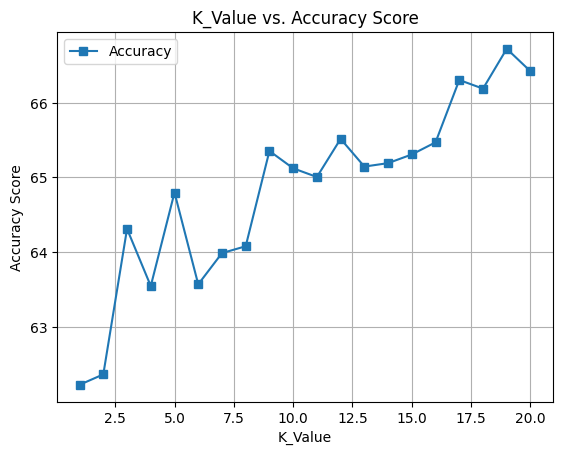

In [ ]:
plt.plot(score['k_value'], score['accuracy']*100, marker = 's', label = 'Accuracy')
plt.title('K_Value vs. Accuracy Score')
plt.xlabel('K_Value')
plt.ylabel('Accuracy Score')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
score = score[(score['k_value'] < 10) & (score['accuracy'] > 0.64)]
k_val = score['k_value'].values

In [ ]:
k_values = list(k_val)

metrics = {
    'k_value': [],
    'sensitivity': [],
    'specificity': [],
    'precision': []
}

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    y_true = y_test

    cm = confusion_matrix(y_true, y_pred)

    # To avoid potential zero-division errors, let's add a small epsilon
    epsilon = 1e-7
    sens = cm[1,1] / (cm[1,1] + cm[0,1] + epsilon)
    spec = cm[0,0] / (cm[0,0] + cm[1,0] + epsilon)
    prec = cm[1,1] / (cm[1,1] + cm[1,0] + epsilon)

    metrics['k_value'].append(k)
    metrics['sensitivity'].append(sens)
    metrics['specificity'].append(spec)
    metrics['precision'].append(prec)

metric_df = pd.DataFrame(metrics)
print(metric_df)

   k_value  sensitivity  specificity  precision
0        3     0.619403     0.689589   0.605103
1        5     0.627014     0.696360   0.614824
2        8     0.661094     0.674769   0.528554
3        9     0.630037     0.702519   0.626974


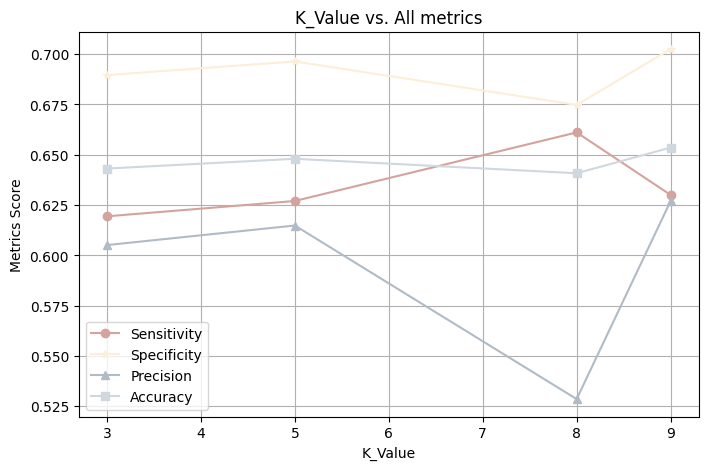

In [ ]:
plt.figure(figsize = (8,5))
plt.plot(metric_df['k_value'], metric_df['sensitivity'], marker = 'o', label = 'Sensitivity', color = '#D4A39D')
plt.plot(metric_df['k_value'], metric_df['specificity'], marker = '*', label = 'Specificity', color = '#FCEED8')
plt.plot(metric_df['k_value'], metric_df['precision'], marker = '^', label = 'Precision', color = '#B1BBC5')
plt.plot(score['k_value'], score['accuracy'], marker = 's', label = 'Accuracy', color = '#CFD7DF')
plt.title('K_Value vs. All metrics')
plt.xlabel('K_Value')
plt.ylabel('Metrics Score')
plt.legend()
plt.grid(True)
plt.show()

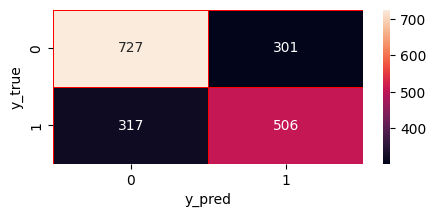

In [22]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_true = y_test

cm = confusion_matrix(y_true, y_pred)

f, ax = plt.subplots(figsize = (5,2))

sns.heatmap(cm, annot = True, linewidths = 0.5, linecolor = 'red', fmt=".0f", ax=ax)
plt.xlabel('y_pred')
plt.ylabel('y_true')
plt.show()

# IV. **Appendix**

In [ ]:
cmap_light = ListedColormap(['#FDDD8C', '#ABC4EE', '#CFD7DF'])
cmap_bold = ListedColormap(['#ABC9EE', '#B3C696', '#FDDD8C'])

k = 10
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(X_train_np[:,:2], y_train_np)

x_min, x_max = X_train_np[:, 0].min() - 1, X_train_np[:, 0].max() + 1
y_min, y_max = X_train_np[:, 1].min() - 1, X_train_np[:, 1].max() + 1
h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X_train_np[:, 0], X_train_np[:, 1], c=y_train_np, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f"2-Class classification (k = {k})")
plt.show()